In [4]:
import sys
sys.path.append("../")
import npccv.fft as nft
import npccv.utils as utils
import numpy as np

class fftimg:
    def __init__(self,img):
        """
            img:tpye->numpy array,one channel
        """
        self.img = img
        self.fft = nft.FFT2(self.img,depart=False)
        self.stm,self.pse = np.abs(self.fft),np.angle(self.fft)
        self.powerMtx = None
        self.power = None

    def PowerMtx(self):
        pass

    def Power(self):
        """
        图像总功率
        """
        return np.sum(np.abs(self.fft) ** 2)

    def lowpass(self,d0 = 30,type = "ideal",n = 2,setRes = False):
        """
        frequency domain filtering
        频域滤波器
        d0:截止半径
        type:默认理想低通滤波器,其他有"butterworth"、"gauss"
        n:butterworth 幂指数
        setRes:调用函数后是否立即改变对象内置的原始图像,默认为False
        """
        huv = np.zeros_like(self.img)
        h,w = self.img.shape

        import math
        if type == "gauss":
            dm = utils.distMat(img,(h//2,w//2),sqrt=False)
            huv = np.power(math.e,-1 * dm / (2*d0**2) )
        elif type == "butterworth":
            dm = utils.distMat(img,(h//2,w//2))
            huv = 1 / (1 + (dm/d0)**(2*n))
        else:
            dm = utils.distMat(img,(h//2,w//2))
            huv[np.where(dm <= d0)] = 1
            huv[np.where(dm > d0)] = 0
        
        sf = np.fft.fftshift(self.fft)
        sf = np.fft.fftshift(sf * huv)
        
        res =  nft.iFFT2(sf)

        if setRes:
            self.img = res

        return res

    def highpass(self,d0 = 30,type = "ideal",n = 2,setRes = False):
        """
        frequency domain filtering
        频域滤波器
        d0:截止半径
        type:默认理想低通滤波器,其他有"butterworth"、"gauss"
        lowpass:
        setRes:调用函数后是否立即改变对象内置的原始图像,默认为False
        """
        huv = np.zeros_like(self.img)
        h,w = self.img.shape

        import math
        if type == "gauss":
            dm = utils.distMat(img,(h//2,w//2),sqrt=False)
            huv = 1 - np.power(math.e,-1 * dm / (2*d0**2) )
        elif type == "butterworth":
            dm = utils.distMat(img,(h//2,w//2))
            huv = 1 / (0.414214+ (d0/dm)**(2*n))
        else:
            dm = utils.distMat(img,(h//2,w//2))
            huv[np.where(dm <= d0)] = 0
            huv[np.where(dm > d0)] = 1
        
        sf = np.fft.fftshift(self.fft)
        sf = np.fft.fftshift(sf * huv)

        res =  nft.iFFT2(sf)
        if setRes:
            self.img = res
        return res


    def FSD(self):
        """
            返回频谱,频域,用于绘图
        """
        res = np.fft.fftshift(self.fft)

        stm = np.log(np.abs(res))
        pse = np.angle(res)

        return  stm,pse

理想、butterworth、高斯滤波器对比

D:\Users\NPC\anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in true_divide


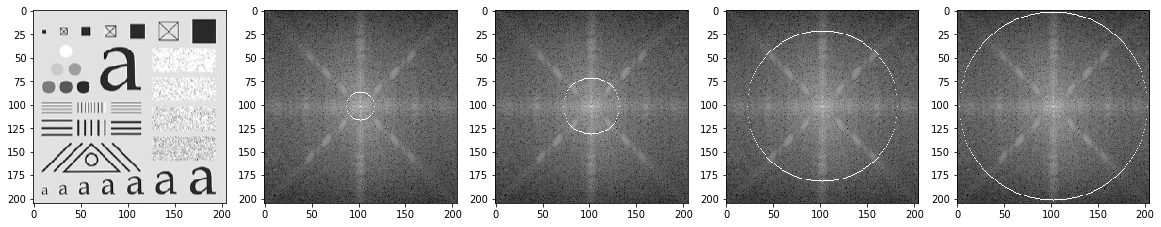

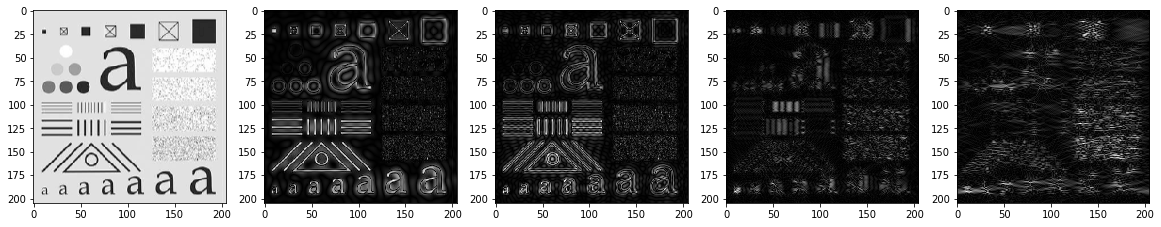

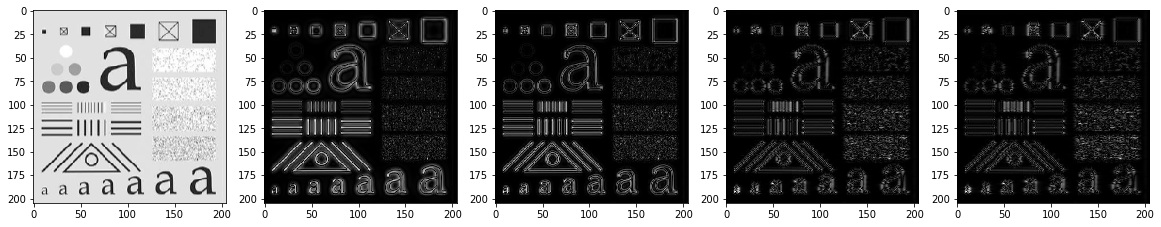

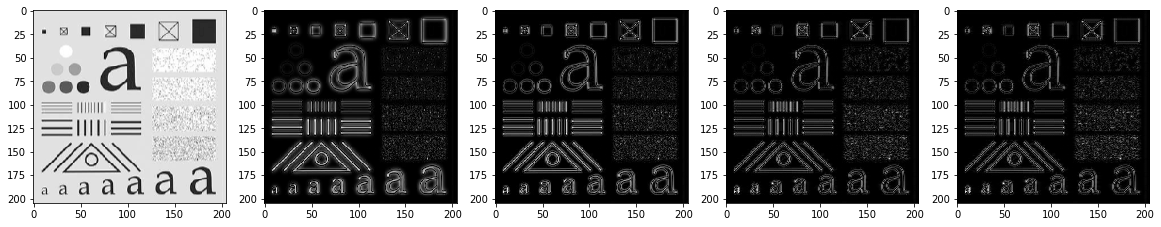

In [5]:
img = utils.readGray('../imgs/c2-2/lpf1.png')
fimg = fftimg(img)
stm,pse = fimg.FSD()

funcs = [
        lambda img:img,
        lambda img:utils.drawCircleToMat(stm,15),
        lambda img:utils.drawCircleToMat(stm,30),
        lambda img:utils.drawCircleToMat(stm,80),
        lambda img:utils.drawCircleToMat(stm,100)
    ]
utils.compare(img,funcs)

funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15),
        lambda img:fimg.highpass(30),
        lambda img:fimg.highpass(80),
        lambda img:fimg.highpass(100)
    ]
utils.compare(img,funcs)


funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15,type="butterworth"),
        lambda img:fimg.highpass(30,type="butterworth"),
        lambda img:fimg.highpass(80,type="butterworth"),
        lambda img:fimg.highpass(100,type="butterworth")
    ]
utils.compare(img,funcs)

funcs = [
        lambda img:img,
        lambda img:fimg.highpass(15,type="gauss"),
        lambda img:fimg.highpass(30,type="gauss"),
        lambda img:fimg.highpass(80,type="gauss"),
        lambda img:fimg.highpass(100,type="gauss")
    ]
utils.compare(img,funcs)

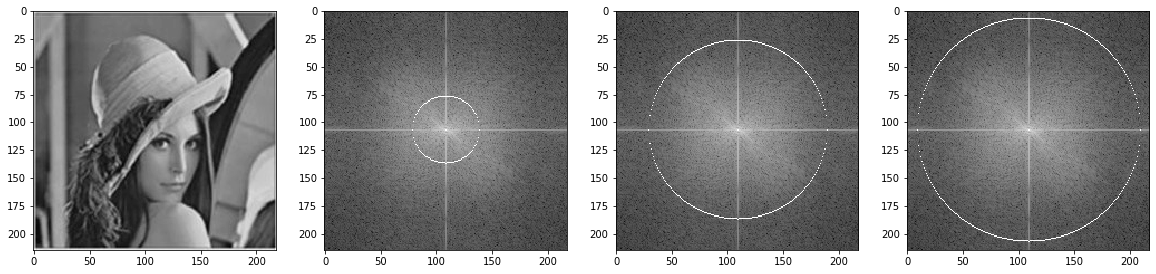

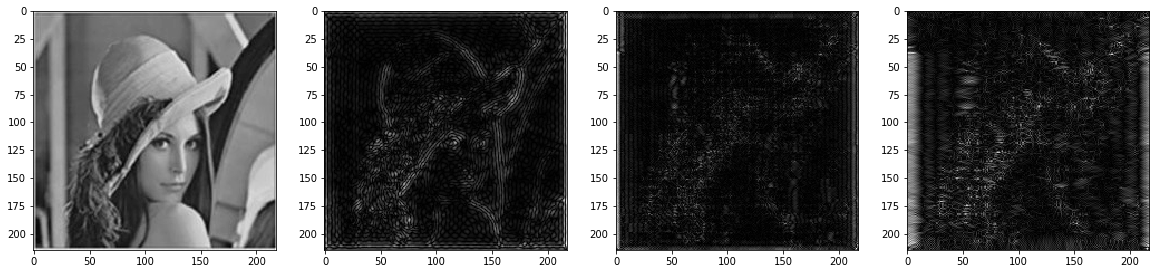

In [6]:
img = utils.readGray('../imgs/c2/fft.jpg')
fimg = fftimg(img)
stm,pse = fimg.FSD()

funcs = [
        lambda img:img,
        lambda img:utils.drawCircleToMat(stm,30),
        lambda img:utils.drawCircleToMat(stm,80),
        lambda img:utils.drawCircleToMat(stm,100)
    ]
utils.compare(img,funcs)

funcs = [
        lambda img:img,
        lambda img:fimg.highpass(30),
        lambda img:fimg.highpass(80),
        lambda img:fimg.highpass(100)
    ]
utils.compare(img,funcs)